In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [4]:
df = pd.read_csv('water.csv')
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


## Задание 1

<AxesSubplot:xlabel='mortality', ylabel='hardness'>

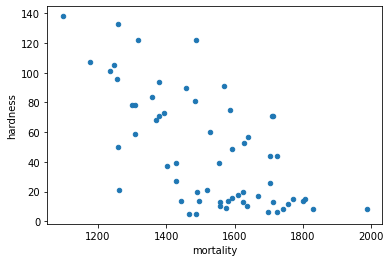

In [6]:
df.plot(kind='scatter',
        x='mortality',
        y='hardness')

In [7]:
df[['mortality','hardness']].corr() # корреляция Пирсона

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [8]:
df[['mortality','hardness']].corr(method='spearman') # корреляции Спирмена

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [9]:
x = df[['hardness']] # то от чего зависит результат
y = df['mortality'] # резултат
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30)

In [10]:
model = LinearRegression() # сама модель 
model.fit(x_train, y_train) # обучение модели на данных

LinearRegression()

In [11]:
model.score(x_test,y_test) # коэффициент детерминации(точность)

-0.38807107438218047

In [12]:
x_const = sm.add_constant(x_train)
model = sm.OLS(y_train, x_const)
results = model.fit()

(array([5., 3., 9., 4., 4., 8., 5., 2., 0., 2.]),
 array([-216.94297598, -164.95151631, -112.96005664,  -60.96859698,
          -8.97713731,   43.01432236,   95.00578203,  146.9972417 ,
         198.98870137,  250.98016103,  302.9716207 ]),
 <BarContainer object of 10 artists>)

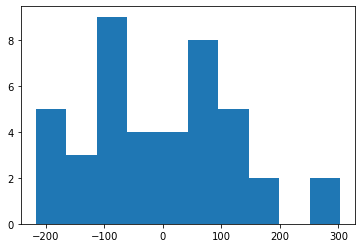

In [15]:
plt.hist(results.resid) # остатки

## Задание 2

In [18]:
# раздели по регионам
df_south = df[df['location'] == 'South'] 
df_north = df[df['location'] == 'North']

## Для юга

<AxesSubplot:xlabel='mortality', ylabel='hardness'>

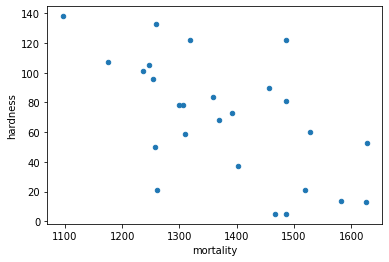

In [19]:
df_south.plot(kind='scatter',
        x='mortality',
        y='hardness')

In [20]:
df_south[['mortality','hardness']].corr() # корреляция Пирсона

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [21]:
df_south[['mortality','hardness']].corr(method='spearman') # корреляции Спирмена

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [22]:
x = df_south[['hardness']] # то от чего зависит результат
y = df_south['mortality'] # резултат
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30)

In [23]:
model = LinearRegression() # сама модель 
model.fit(x_train, y_train) # обучение модели на данных
model.score(x_test,y_test) # коэффициент детерминации(точность)

0.04674545525333074

(array([4., 5., 1., 1., 2., 0., 3., 0., 0., 2.]),
 array([-124.14093682,  -89.21077635,  -54.28061587,  -19.3504554 ,
          15.57970508,   50.50986555,   85.44002603,  120.3701865 ,
         155.30034698,  190.23050746,  225.16066793]),
 <BarContainer object of 10 artists>)

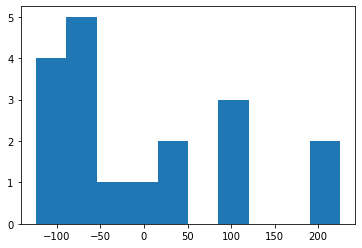

In [24]:
x_const = sm.add_constant(x_train)
model = sm.OLS(y_train, x_const)
results = model.fit()
plt.hist(results.resid) # остатки

## Для севера

<AxesSubplot:xlabel='mortality', ylabel='hardness'>

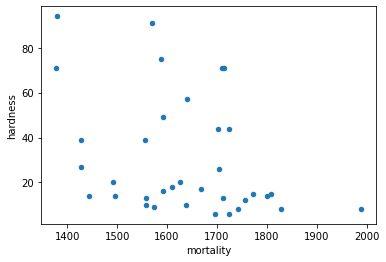

In [25]:
df_north.plot(kind='scatter',
        x='mortality',
        y='hardness')

In [26]:
df_north[['mortality','hardness']].corr() # корреляция Пирсона

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [27]:
df_north[['mortality','hardness']].corr(method='spearman') # корреляции Спирмена

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [28]:
x = df_north[['hardness']] # то от чего зависит результат
y = df_north['mortality'] # резултат
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30)

In [29]:
model = LinearRegression() # сама модель 
model.fit(x_train, y_train) # обучение модели на данных
model.score(x_test,y_test) # коэффициент детерминации(точность)

0.15725780531639522

In [ ]:
x_const = sm.add_constant(x_train)
model = sm.OLS(y_train, x_const)
results = model.fit()
plt.hist(results.resid) # остатки